In [1]:
#workshop 1

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [36]:
sb.set()

cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv('./csv/pima-indians-diabetes.csv', names=cols)
df.shape

(768, 9)

In [37]:
df.drop('insu', axis=1, inplace=True)
df['bmi'] = df['bmi'].replace(0, df.median())
df['plas'] = df['plas'].replace(0, df.median())
df['preg'] = df['preg'].replace(0, df.median())
df['skin'] = df['skin'].replace(0, df.median())
X = df.drop('class', axis=1)
y = df['class']
X.shape, y.shape

((768, 7), (768,))

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=None)

cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score: {}'.format(cvs.round(2)))
print('Average(%): {:.2f}'.format(cvs.mean()*100))

cross_val_score: [0.73 0.66 0.65 0.64 0.66 0.69 0.77 0.79 0.66 0.67]
Average(%): 69.13


In [40]:
model = DecisionTreeClassifier(criterion='gini', max_depth=None)

cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score: {}'.format(cvs.round(2)))
print('Average(%): {:.2f}'.format(cvs.mean()*100))

cross_val_score: [0.69 0.77 0.69 0.61 0.71 0.75 0.79 0.79 0.62 0.79]
Average(%): 72.13


In [41]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [42]:
X = X.astype('float64')
sc = Scaler()
X_sc = sc.fit_transform(X)

df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head()

,preg,plas,pres,skin,bmi,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.642325,0.943638,0.200000


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [44]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [45]:
result = []
names = []

In [46]:
for name, model in models:
    cvs = cross_val_score(model, X, y, cv=10)
    result.append(cvs)
    names.append(name)
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std()))

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

LR   0.770 (0.034)
kNN  0.746 (0.052)
NB   0.757 (0.045)


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/si

SVC  0.651 (0.003)
RFC  0.753 (0.044)
DT   0.723 (0.079)


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/apple/opt/anaconda3/l

In [47]:
result[:6]

[array([0.74025974, 0.75324675, 0.79220779, 0.72727273, 0.75324675,
        0.76623377, 0.81818182, 0.80519481, 0.72368421, 0.81578947]),
 array([0.74025974, 0.81818182, 0.68831169, 0.68831169, 0.68831169,
        0.80519481, 0.75324675, 0.81818182, 0.69736842, 0.76315789]),
 array([0.74025974, 0.77922078, 0.76623377, 0.68831169, 0.7012987 ,
        0.76623377, 0.76623377, 0.83116883, 0.71052632, 0.81578947]),
 array([0.64935065, 0.64935065, 0.64935065, 0.64935065, 0.64935065,
        0.64935065, 0.64935065, 0.64935065, 0.65789474, 0.65789474]),
 array([0.71428571, 0.74025974, 0.76623377, 0.67532468, 0.7012987 ,
        0.76623377, 0.79220779, 0.83116883, 0.76315789, 0.77631579]),
 array([0.67532468, 0.75324675, 0.74025974, 0.55844156, 0.7012987 ,
        0.74025974, 0.79220779, 0.81818182, 0.63157895, 0.81578947])]

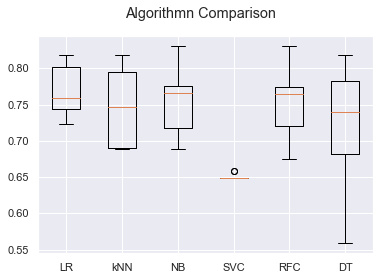

In [48]:
fig = plt.figure()
fig.suptitle('Algorithmn Comparison')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'C': [1.0, 3.0, 5.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', verbose=10)
grid_search.fit(X_sc, y)
grid_search.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, score=0.727, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, score=0.766, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, score=0.792, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, score=0.740, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, score=0.740, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, ker

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, score=0.740, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, score=0.818, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, score=0.766, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, score=0.818, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, score=0.724, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, score=0.842, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False .......
[CV]  C=1.0, coef0=0.0, gamm

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:   20.0s finished


0.7760416666666666

In [51]:
grid_search.best_params_

{'C': 3.0,
 'coef0': 0.1,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'shrinking': True}

In [52]:
grid_search.best_estimator_

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.1,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
model = grid_search.best_estimator_

cvs = cross_val_score(model, X_sc, y, cv=10)
print('cross_val_score: {}'.format(cvs.round(2)))
print('Average(%): {:.2f}'.format(cvs.mean()*100))

cross_val_score: [0.74 0.74 0.79 0.74 0.74 0.81 0.78 0.82 0.75 0.86]
Average(%): 77.61


In [55]:
model = SVC(kernel='linear')

cvs = cross_val_score(model, X_sc, y, cv=10)
print('cross_val_score: {}'.format(cvs.round(2)))
print('Average(%): {:.2f}'.format(cvs.mean()*100))

cross_val_score: [0.73 0.77 0.79 0.74 0.74 0.79 0.79 0.81 0.71 0.82]
Average(%): 76.82


In [59]:
model = SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.1,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
model.fit(X_sc, y)

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.1,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [63]:
param_dict = {
    'C': uniform(1.0, 5.0),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model = SVC()

md_search = RandomizedSearchCV(model, param_dict, n_iter=100, cv=10, 
                               scoring='accuracy', random_state=10, verbose=10)
md_search.fit(X_sc, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False, score=0.740, total=   0.0s
[CV] C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False, score=0.779, total=   0.0s
[CV] C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False, score=0.818, total=   0.0s
[CV] C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False, score=0.740, total=   0.0s
[CV] C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=4.856603216333729, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False, score=0.727, total=   0.0s
[CV] C=4.856603

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  C=5.159556794856004, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False, score=0.724, total=   0.0s
[CV] C=5.159556794856004, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False 
[CV]  C=5.159556794856004, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False, score=0.816, total=   0.0s
[CV] C=4.54604004921506, coef0=0.1, gamma=auto, kernel=poly, shrinking=True 
[CV]  C=4.54604004921506, coef0=0.1, gamma=auto, kernel=poly, shrinking=True, score=0.753, total=   0.0s
[CV] C=4.54604004921506, coef0=0.1, gamma=auto, kernel=poly, shrinking=True 
[CV]  C=4.54604004921506, coef0=0.1, gamma=auto, kernel=poly, shrinking=True, score=0.766, total=   0.0s
[CV] C=4.54604004921506, coef0=0.1, gamma=auto, kernel=poly, shrinking=True 
[CV]  C=4.54604004921506, coef0=0.1, gamma=auto, kernel=poly, shrinking=True, score=0.766, total=   0.0s
[CV] C=4.54604004921506, coef0=0.1, gamma=auto, kernel=poly, shrinking=True 
[CV]  C=4.54604004921506, coef0=0.1, gamma=auto, kernel=poly, shrinking=True, score=0.7

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   10.4s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fde08306350>,
                                        'coef0': [0.0, 0.1, 0.5],
                                        'gamma': ['auto', 1, 0.1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
  

In [64]:
md_search.best_score_

0.7760416666666666

In [65]:
md_search.best_params_

{'C': 2.840133404177297,
 'coef0': 0.5,
 'gamma': 0.1,
 'kernel': 'rbf',
 'shrinking': True}

In [66]:
md_search.best_estimator_

SVC(C=2.840133404177297, cache_size=200, class_weight=None, coef0=0.5,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
model = md_search.best_estimator_

cvs = cross_val_score(model, X_sc, y, cv=10)
print('cross_val_score: {}'.format(cvs.round(2)))
print('Average(%): {:.2f}'.format(cvs.mean()*100))

cross_val_score: [0.73 0.75 0.79 0.75 0.75 0.81 0.79 0.81 0.72 0.86]
Average(%): 77.61


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_sc, y)
grid_search.best_score_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.7s finished


0.7421875

In [70]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [71]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [75]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 5),
    'min_samples_split': randint(2, 5)
}

model = DecisionTreeClassifier()

md_search = RandomizedSearchCV(model, param_dict, cv=10, 
                               scoring='accuracy', random_state=10, 
                               verbose=10)
md_search.fit(X_sc, y)
md_search.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] criterion=entropy, max_depth=3, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, score=0.714, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, score=0.675, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, score=0.714, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=2, score=0.792, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, min_samples_split=2, score=0.675, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=2, score=0.727, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=2, score=0.766, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=2, score=0.711, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=2, score=0.750, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, score=0.740, tota

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


0.7369791666666666

In [76]:
md_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [77]:
md_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')